In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
population = 69799978	
#
total_case = 467707
bed = 143744
cured = 320152
death = 3811

In [3]:
preval_rateth = total_case / population

In [4]:
preval_rateth

0.006700675464396278

In [5]:
from scipy.stats import binom

In [6]:
binom.pmf(11, 20, 0.5)

0.1601791381835938

In [7]:
pop = []
for i in range(0, 1000):
    pop.append(i)

graph = pd.DataFrame()
graph["Population"] = pop

preval_rate = [.005, .006, .007, .008, 0.01, 0]
for i in range(0, 5):
    atleastone = []
    for y in range(0,len(pop)):
        atleastone.append(1 - binom.pmf(0, graph["Population"].iloc[y], preval_rate[i]))

    print(preval_rate[i])
    graph[str(preval_rate[i])] = atleastone 

0.005
0.006
0.007
0.008
0.01


In [8]:
import matplotlib

In [9]:
graph.set_index("Population", inplace = True)

<AxesSubplot:title={'center':'At least 1 infected'}, xlabel='Population'>

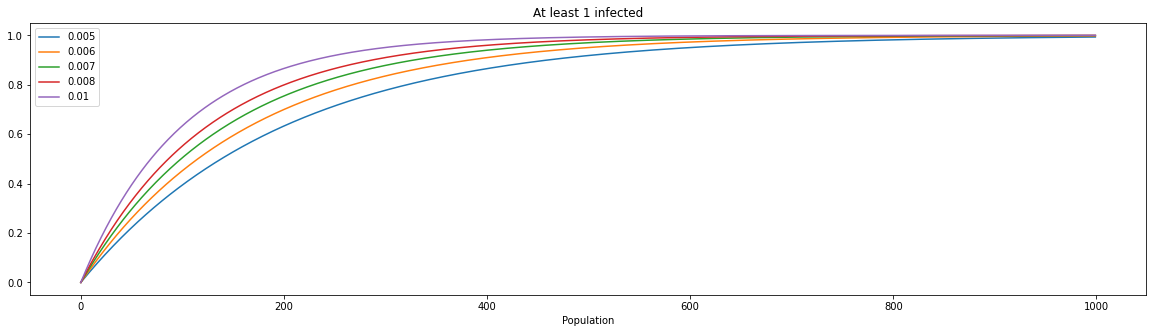

In [10]:
graph.plot(title="At least 1 infected", figsize = (20, 5))

# How much people does it take to get severe symptoms?
### according to https://www.yalemedicine.org/news/covid-19-vaccine-comparison and https://www.who.int/news-room/feature-stories/detail/the-sinovac-covid-19-vaccine-what-you-need-to-know

In [11]:
#vaccine success rate, 2 dose, PREVENTING SEVERE DISEASE
pfizer = .95
moderna =  .941
jj = .86
az = .76
sinovac = .51

vax_list = (pfizer, moderna, jj, az, sinovac)
vax_names = ("pfizer", "moderna", "jj", "az", "sinovac")

In [12]:
pop = []
for i in range(0, 40):
    pop.append(i)

graph = pd.DataFrame()
graph["Population"] = pop

for i in range(0, len(vax_list)):
    infected = []
    for y in range(0,len(pop)):
        infected.append( 1 - binom.pmf( 0 , graph["Population"].iloc[y] , (1 - vax_list[i]) ) )

    graph[str(vax_names[i])] = infected

graph.set_index("Population", inplace = True)

<AxesSubplot:title={'center':'How many people with COVID-19 WILL get you infected with SERIOUS SYMPTOMS?'}, xlabel='Population'>

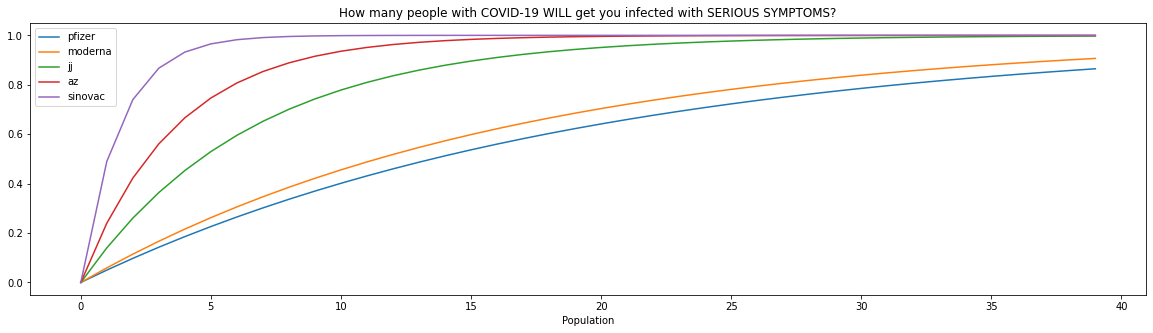

In [13]:
graph.plot(title = "How many people with COVID-19 WILL get you infected with SERIOUS SYMPTOMS?", figsize = (20, 5))

<AxesSubplot:title={'center':'How many random people wil get you infected with SERIOUS SYMPTOMS? (Prevalence rate in Thailand)'}, xlabel='Population'>

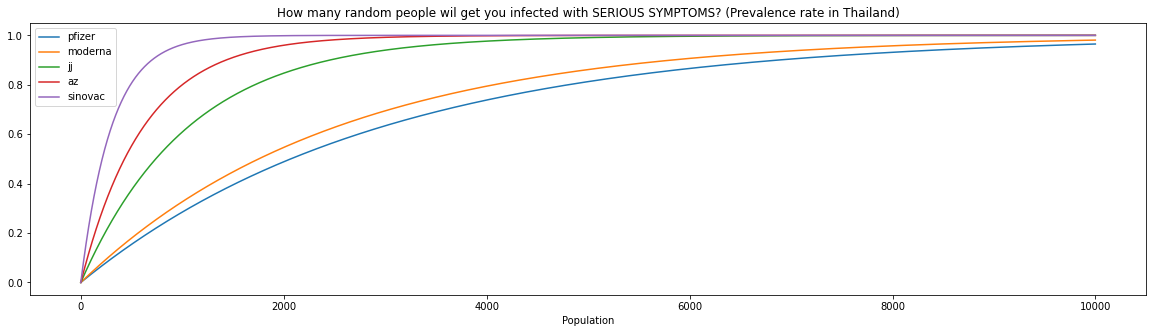

In [14]:
pop = []
for i in range(0, 10000):
    pop.append(i)

graph = pd.DataFrame()
graph["Population"] = pop

for i in range(0, len(vax_list)):
    infected = []
    for y in range(0,len(pop)):
        infected.append( 1 - binom.pmf( 0 , graph["Population"].iloc[y] , ((1 - vax_list[i]) * preval_rateth) ) )

    graph[str(vax_names[i])] = infected

graph.set_index("Population", inplace = True)

graph.plot(title = "How many random people wil get you infected with SERIOUS SYMPTOMS? (Prevalence rate in Thailand)", figsize = (20, 5))

In [15]:
preval_rateth

0.006700675464396278

In [16]:
binom.pmf(2, 1000, preval_rateth)

0.027337105135925046

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


<AxesSubplot:title={'center':'Probability of x people infected (Prevalence rate in Thailand)'}, xlabel='Population'>

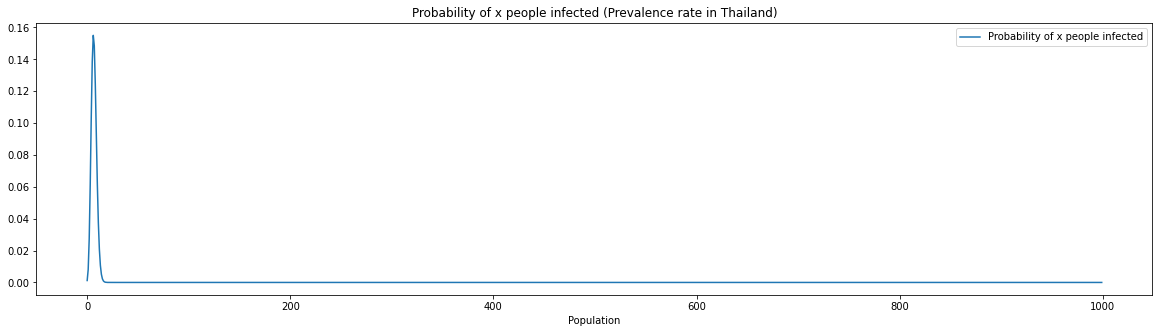

In [17]:
#Expected number of people infected in Thailand

pop = []
for i in range(0, 1000):
    pop.append(i)

graph = pd.DataFrame()
graph["Population"] = pop

prob = []
for i in range(0, len(pop)):
    prob.append(binom.pmf( pop[i], 1000, preval_rateth))

graph["Probability of x people infected"] = prob

graph.set_index("Population", inplace = True)

graph.plot(title = "Probability of x people infected (Prevalence rate in Thailand)", figsize = (20, 5))

In [18]:
#EZ Way > Average (expected value = np) so 1000 * .006 = 6
print("5 people" + str(binom.pmf(5, 1000, preval_rateth)))
print("6 people" + str(binom.pmf(6, 1000, preval_rateth)))
print("7 people" + str(binom.pmf(7, 1000, preval_rateth)))

5 people0.13861225941039654
6 people0.15506433358668337
7 people0.14853838764596955
